In [1]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.parser import parse
import calendar
import numpy as np
import sys


#Returns the month from input string
def returnMonth(string):
    try:
        return calendar.month_name[datetime.strptime((string), '%m/%d/%Y').month]
    except:
        return np.nan

#Returns the year from input string
def returnTime(string):
    try:
        string += "m"
        time = datetime.strptime((string), '%I%M%p')
        return str(time.strftime("%H"))
    except:
        return np.nan

In [11]:
#Read all parking ticket CSVs in
data2014 = pd.read_csv("Z:/BDA Datasets/ParkingTickets/Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv", low_memory=False)
data2015 = pd.read_csv("Z:/BDA Datasets/ParkingTickets/Parking_Violations_Issued_-_Fiscal_Year_2015.csv", low_memory=False)
data2016 = pd.read_csv("Z:/BDA Datasets/ParkingTickets/Parking_Violations_Issued_-_Fiscal_Year_2016.csv", low_memory=False)
data2017 = pd.read_csv("Z:/BDA Datasets/ParkingTickets/Parking_Violations_Issued_-_Fiscal_Year_2017.csv", low_memory=False)

#Concatenate into one
arr = [data2014,data2015,data2016,data2017]
allData = pd.concat(arr)


D:\Users\Hamza\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [12]:
allData = allData.filter(['Issue Date', 'Plate ID' 'Violation Code', 'Vehicle Body Type', 'Vehicle Make','Street Code1','Steet Code2','Street Code3','Violation Location','Violation Time','Vehicle Color','Vehicle Year'])

In [13]:
#List all unique colours entered as well as frequency.  
pd.value_counts(allData['Vehicle Color']).to_dict()


{'GY': 6280314,
 'WH': 6074770,
 'WHITE': 5624960,
 'BK': 5121030,
 'BLACK': 2758479,
 'BL': 2193035,
 'GREY': 1668739,
 'RD': 1383881,
 'SILVE': 1253287,
 'BROWN': 1194809,
 'BLUE': 1178034,
 'RED': 1060329,
 'GR': 875167,
 'TN': 575236,
 'GREEN': 561270,
 'OTHER': 434107,
 'YW': 343838,
 'BR': 341887,
 'BLK': 318174,
 'GRAY': 278593,
 'TAN': 242193,
 'GL': 238333,
 'GOLD': 191405,
 'YELLO': 190671,
 'GRY': 147129,
 'MR': 140622,
 'WHT': 132713,
 'WT': 87742,
 'ORANG': 63572,
 'OR': 54614,
 'LTG': 51465,
 'SL': 44690,
 'BRN': 43945,
 'WHI': 43520,
 'BLU': 39762,
 'SIL': 36823,
 'LT/': 35180,
 'DK/': 31941,
 'PURPL': 29535,
 'GRN': 28664,
 'DKG': 24324,
 'PR': 22612,
 'LTGY': 22367,
 'GN': 18044,
 'SILVR': 17979,
 'BN': 13663,
 'DKB': 11485,
 'DKGY': 10468,
 'SILV': 9593,
 'GYGY': 7369,
 'BEIGE': 7062,
 'MAROO': 6775,
 'WHBL': 6337,
 'BRWN': 6143,
 'W': 5751,
 'LTB': 5684,
 'LAVEN': 5539,
 'GLD': 5477,
 'RD/': 5418,
 'DKBL': 5307,
 'BLG': 5294,
 'BRO': 5278,
 'BKGY': 5257,
 'RDW': 4918

In [14]:
#Use the above to create arrays to store spelling variants
GreyVariant = ["GREY","GY","GRAY","GRY","DKGY"]
WhiteVariant = ["WHITE","WH","WHT","WHI","W"]
BrownVariant = ["BROWN","TN","BR","TAN","BRN","BN","BRWN","BRO","BRW"]
RedVariant = ["RED","RD","MR","MAROO","DKR","R","BURG","MAR"]
GreenVariant = ["GREEN","GN","GR","LTG","GRN","G"]
BlackVariant = ["BLACK","BK","BL","BLK","BLCK"]
BlueVariant = ["BLUE","BLU","DKB","DKBL","B"]
GoldVariant = ["GOLD","GLD","GL","GD"]
YellowVariant = ["YELLOW","YELL","YW","YELLO","YEL"]
SilverVariant = ["SILVER","SILVE","SL","SIL","SILVR","SILV","SLVR"]
OrangeVariant = ["ORANGE","OR","ORANG","IR"]
PurpleVariant = ["PURPLE","PURPL"]
PinkVariant = ["PINK","PNK"]
BeigeVariant = ["BEIGE","BEIG"]

In [15]:
def correctCols(col):
    if col in GreyVariant:
        return "GREY"
    elif col in WhiteVariant:
        return "WHITE"
    elif col in BrownVariant:
        return "BROWN"
    elif col in RedVariant:
        return "RED"
    elif col in GreenVariant:
        return "GREEN"
    elif col in BlackVariant:
        return "BLACK"
    elif col in BlueVariant:
        return "BLUE"
    elif col in GoldVariant:
        return "GOLD"
    elif col in YellowVariant:
        return "YELLOW"
    elif col in SilverVariant:
        return "SILVER"
    elif col in OrangeVariant:
        return "ORANGE"
    elif col in PurpleVariant:
        return "PURPLE"
    elif col in PinkVariant:
        return "PINK"
    elif col in BeigeVariant:
        return "BEIGE"
    else: return np.nan


In [16]:
allData['Vehicle Color'] = allData['Vehicle Color'].apply(lambda x: correctCols(x))

In [17]:
allData = allData.dropna(subset=['Vehicle Color','Vehicle Make','Vehicle Body Type'])
#List all unique colours entered as well as frequency.  
pd.value_counts(allData['Vehicle Color']).to_dict()
print(allData.count())

Issue Date            40554994
Vehicle Body Type     40554994
Vehicle Make          40554994
Street Code1          40554994
Street Code3          40554994
Violation Location    34756188
Violation Time        40550631
Vehicle Color         40554994
Vehicle Year          40554994
dtype: int64


In [38]:
allData = allData.groupby('Vehicle Make').filter(lambda x: len(x) > 300000)
print(pd.value_counts(allData['Vehicle Make']).to_dict())


{'FORD': 5201242, 'TOYOT': 4301128, 'HONDA': 3863286, 'NISSA': 3194756, 'CHEVR': 3005810, 'FRUEH': 1531885, 'ME/BE': 1399069, 'DODGE': 1395392, 'BMW': 1335369, 'GMC': 1161179, 'INTER': 1128480, 'JEEP': 1127840, 'HYUND': 989621, 'LEXUS': 880412, 'ACURA': 745151, 'VOLKS': 707682, 'CHRYS': 696527, 'INFIN': 606182, 'NS/OT': 487193, 'SUBAR': 478671, 'AUDI': 476960, 'LINCO': 474025, 'ISUZU': 471869, 'MITSU': 461768, 'MAZDA': 410816, 'KIA': 359436, 'CADIL': 341066, 'MERCU': 313242, 'VOLVO': 303136}


(14, 0)

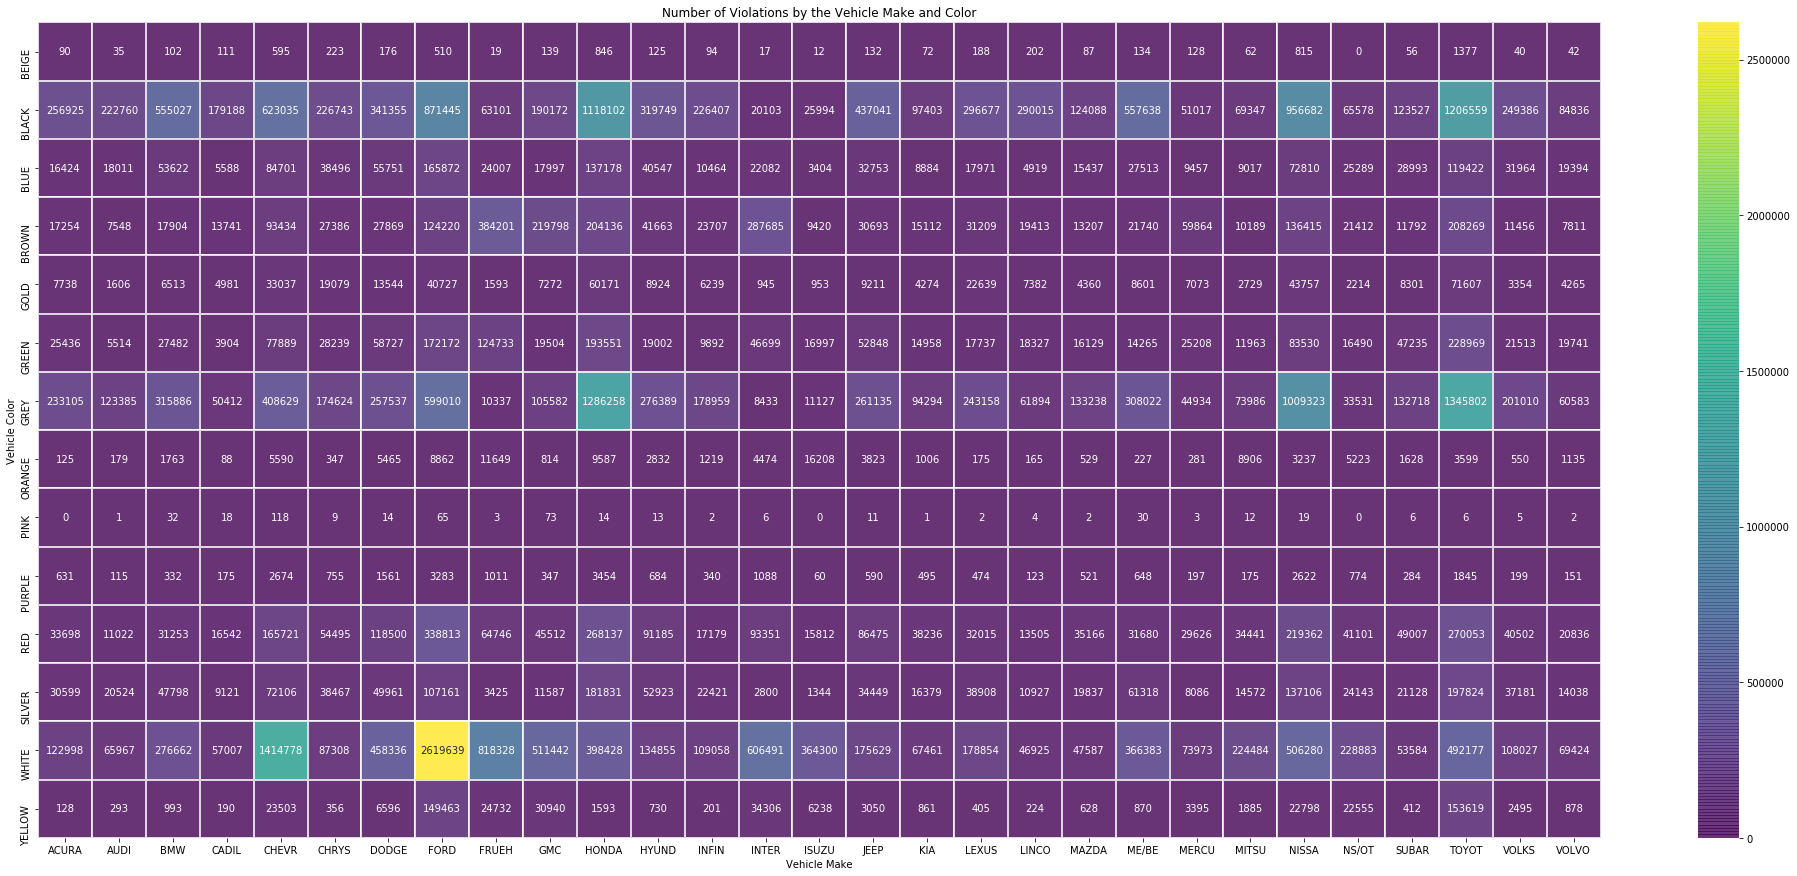

In [89]:
fig, ax = plt.subplots(figsize=(35,15))
kwargs = {'alpha':0.8,'linewidth':1, 'linestyle':'--',  "capstyle":'projecting'}

pivot = allData.pivot_table(index='Vehicle Color',columns='Vehicle Make',aggfunc='size',fill_value=0)

sns.heatmap(pivot,**kwargs, cmap='viridis', ax=ax,annot=True,fmt = 'd',square=False)

#Show title/labels
ax.set(title='Number of Violations by the Vehicle Make and Color')

#ax.set_ylim(14, 0)

